# Required packages

In [93]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, classification_report
from imblearn.over_sampling import ADASYN

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import dataset

In [96]:
cs = pd.read_csv("/content/drive/MyDrive/4 1-2565/CS345/data/Churn_Modelling.csv")
cs

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# EDA

In [97]:
cs["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [98]:
cs.duplicated().sum()

0

In [99]:
cs.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [100]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [101]:
cs["SeniorCitizen"] = np.where(cs['Age']<= 60, 0, 1)
cs

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SeniorCitizen
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0


In [102]:
cs["SeniorCitizen"].value_counts()

0    9536
1     464
Name: SeniorCitizen, dtype: int64

In [103]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  SeniorCitizen    10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+ MB


In [104]:
cs = cs.astype({'HasCrCard': 'object',"IsActiveMember":"object","SeniorCitizen":"object"})
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  SeniorCitizen    10000 non-null  object 
dtypes: float64(2), int64(7), object(6)
memory usage: 1.1+ MB


continuous and category features

In [105]:
con_feas = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]

In [106]:
cs.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'SeniorCitizen'],
      dtype='object')

In [107]:
cate_feas = cs.columns[~cs.columns.isin(['RowNumber','CustomerId','Surname',"CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary","Exited"])].to_list()
cate_feas

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'SeniorCitizen']

# Visualization

,index,Exited
0,0,0.7963
1,1,0.2037


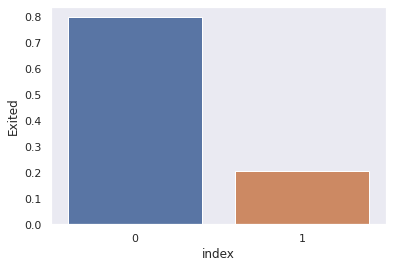

In [108]:
density = cs['Exited'].value_counts(normalize=True).reset_index()
sns.barplot(data=density, x='index', y='Exited', );
density

# of Bivariate Outliers: 19


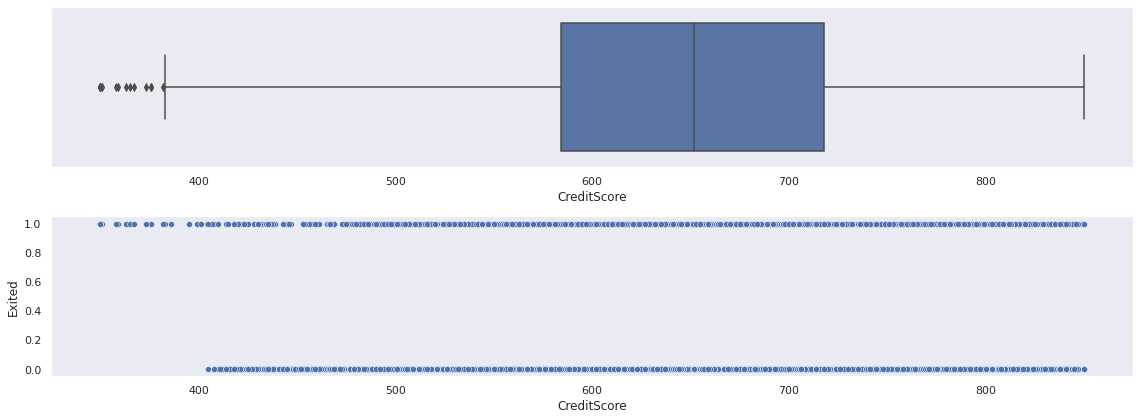

In [109]:
def box_scatter(data, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1)
    sns.scatterplot(data=data, x=x,y=y,ax=ax2)

box_scatter(cs,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(cs.loc[cs['CreditScore'] < 400])}")

# of Bivariate Outliers: 3


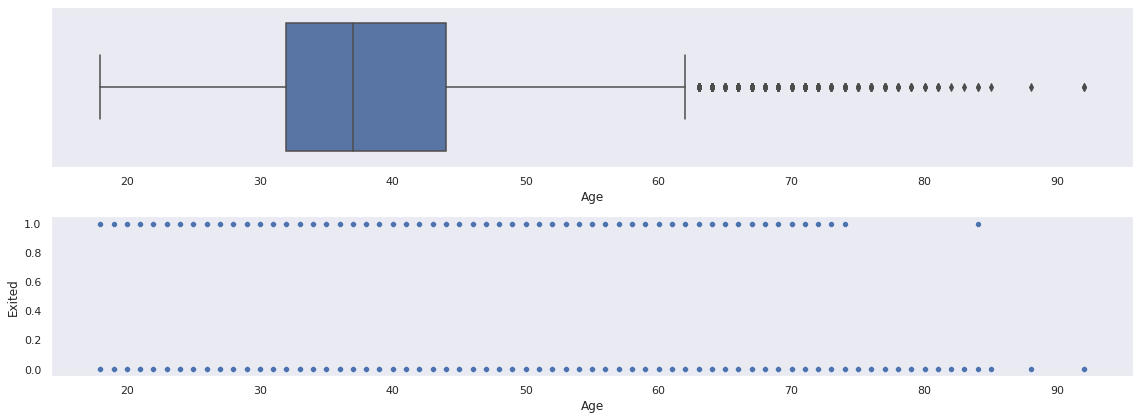

In [110]:
box_scatter(cs,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(cs.loc[cs['Age'] > 87])}")

# of Bivariate Outliers: 4


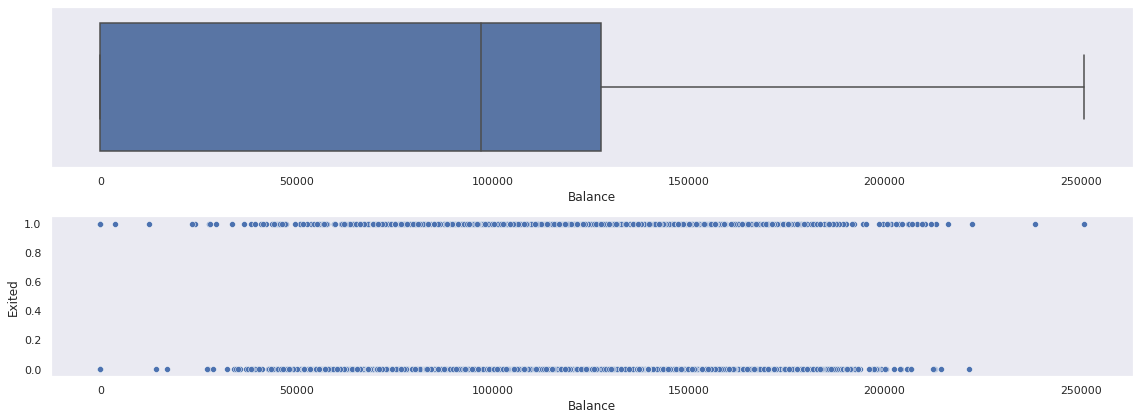

In [111]:
box_scatter(cs,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(cs.loc[cs['Balance'] > 220000])}")

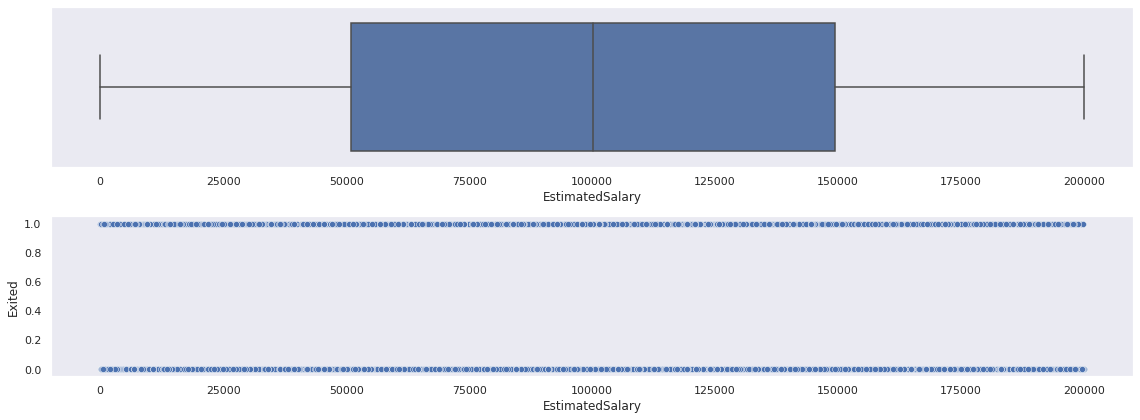

In [112]:
box_scatter(cs,'EstimatedSalary','Exited');
plt.tight_layout()

In [113]:
cs['Geography'][cs['Exited'] == 1]

0        France
2        France
5         Spain
7       Germany
16      Germany
         ...   
9981    Germany
9982    Germany
9991     France
9997     France
9998    Germany
Name: Geography, Length: 2037, dtype: object

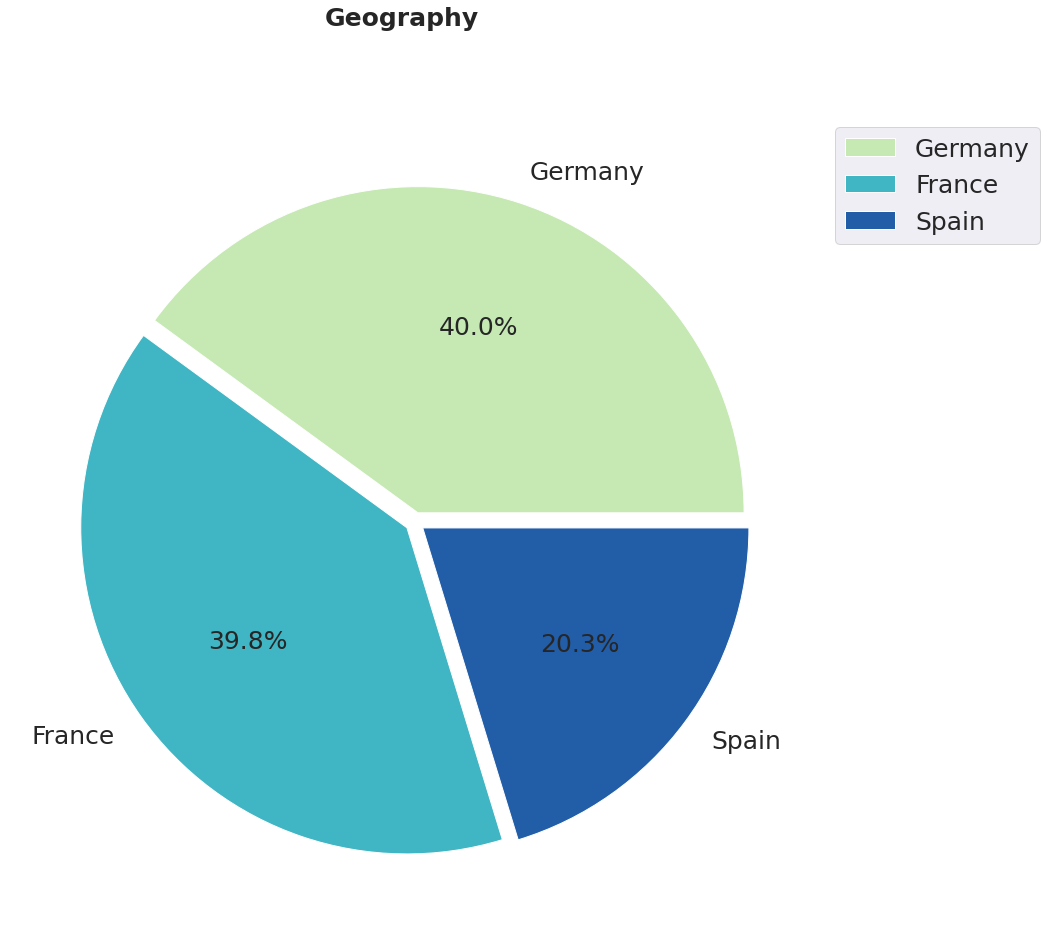

In [114]:
plt.figure(figsize = (15,15))
x=cs['Geography'][cs['Exited'] == 1].value_counts().index
y=cs['Geography'][cs['Exited'] == 1].value_counts().values.tolist()
data = cs.groupby("Geography").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))

        
plt.pie(y, labels = x, colors = pal, autopct='%1.1f%%', textprops={'fontsize': 25},
        explode=[0.03 for i in cs['Geography'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1) , prop={'size': 25})
plt.suptitle ('Geography',weight = 'bold',fontsize = 25)
plt.show()

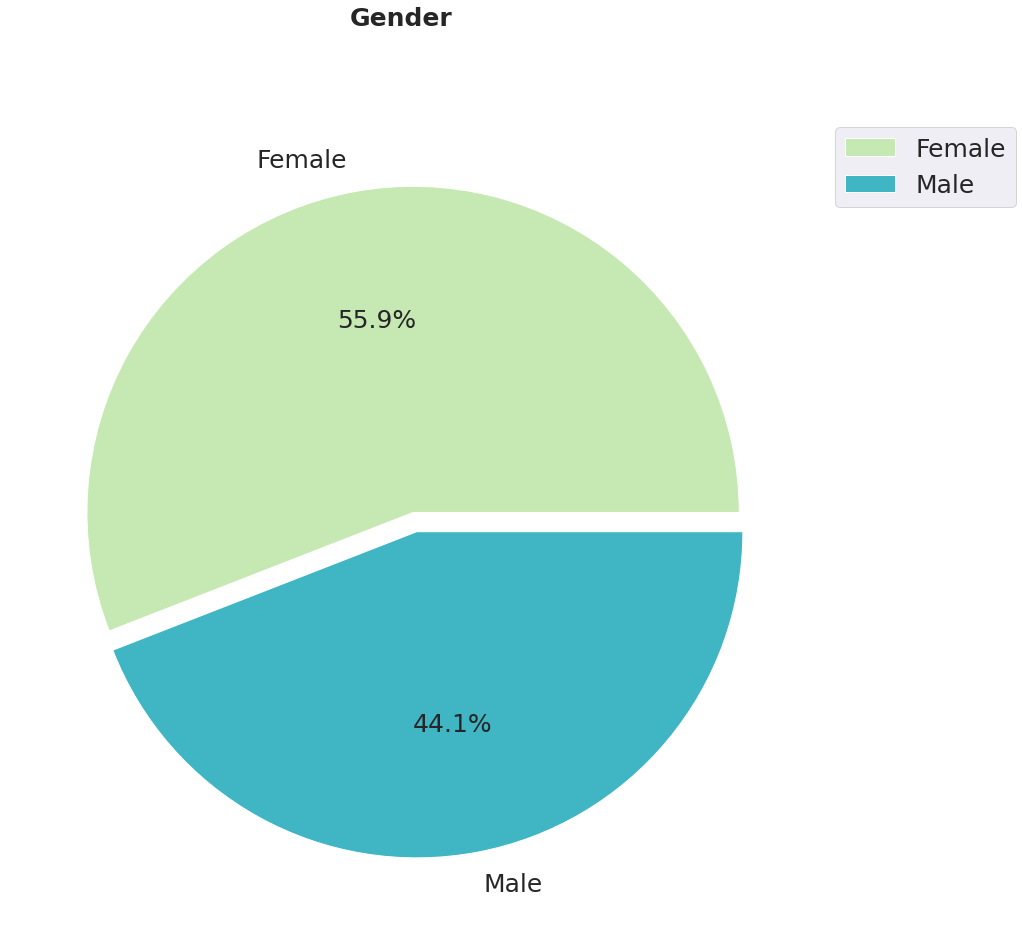

In [115]:
plt.figure(figsize = (15,15))
x=cs['Gender'][cs['Exited'] == 1].value_counts().index
y=cs['Gender'][cs['Exited'] == 1].value_counts().values.tolist()
data = cs.groupby("Geography").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))

        
plt.pie(y, labels = x, colors = pal, autopct='%1.1f%%', textprops={'fontsize': 25},
        explode=[0.03 for i in cs['Gender'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1) , prop={'size': 25})
plt.suptitle ('Gender',weight = 'bold',fontsize = 25)
plt.show()

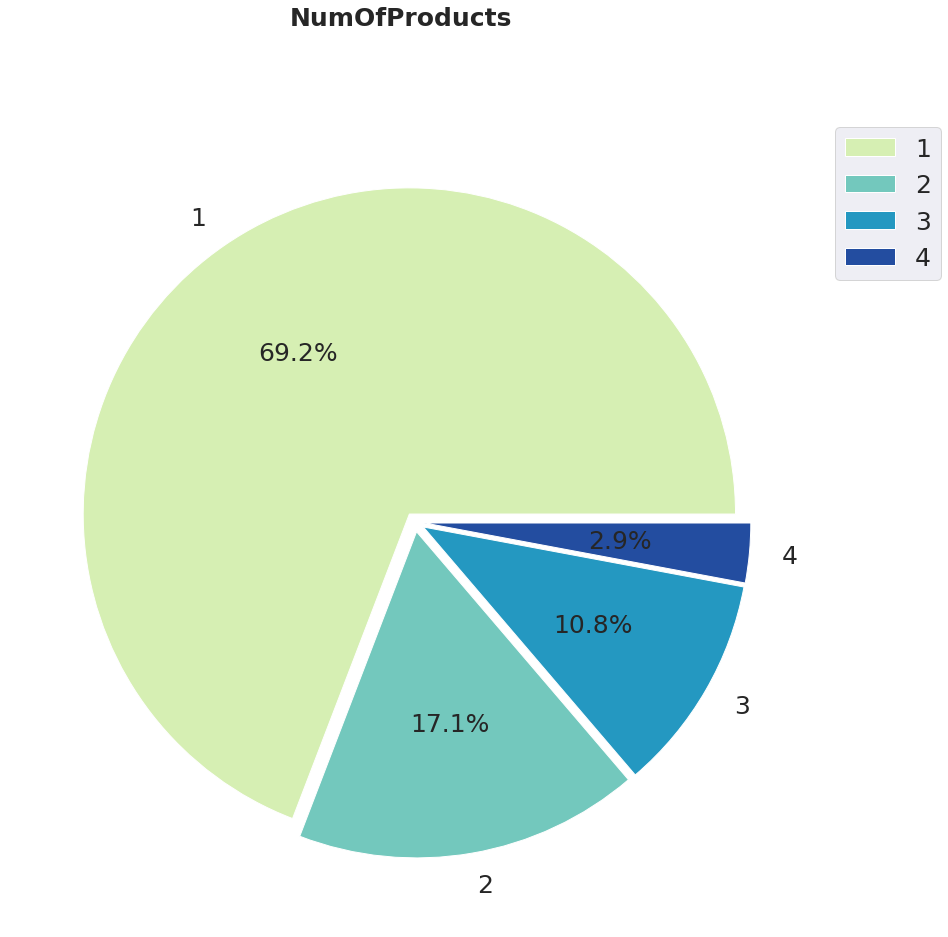

In [116]:
plt.figure(figsize = (15,15))
x=cs['NumOfProducts'][cs['Exited'] == 1].value_counts().index
y=cs['NumOfProducts'][cs['Exited'] == 1].value_counts().values.tolist()
data = cs.groupby("NumOfProducts").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))

        
plt.pie(y, labels = x, colors = pal, autopct='%1.1f%%', textprops={'fontsize': 25},
        explode=[0.03 for i in cs['NumOfProducts'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1) , prop={'size': 25})
plt.suptitle ('NumOfProducts',weight = 'bold',fontsize = 25)
plt.show()

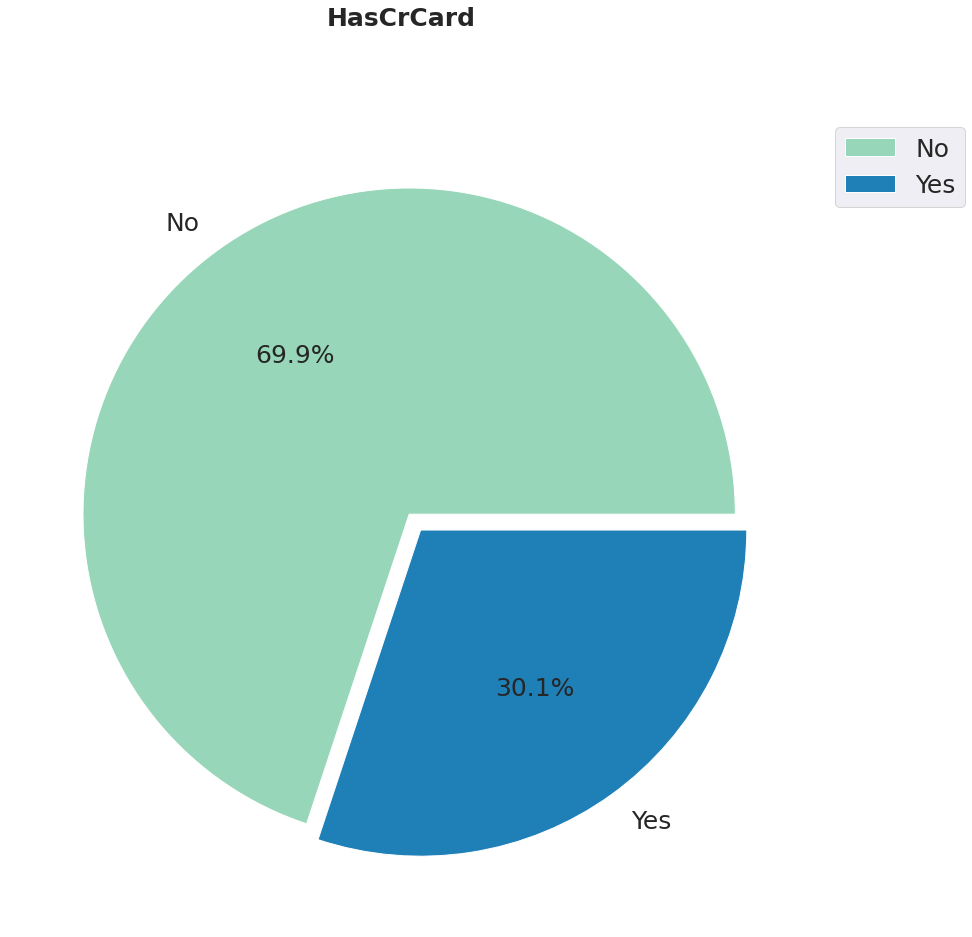

In [117]:
plt.figure(figsize = (15,15))
x=cs['HasCrCard'][cs['Exited'] == 1].value_counts().index
y=cs['HasCrCard'][cs['Exited'] == 1].value_counts().values.tolist()
data = cs.groupby("HasCrCard").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))

        
plt.pie(y, labels =  ["No","Yes"], colors = pal, autopct='%1.1f%%', textprops={'fontsize': 25},
        explode=[0.03 for i in cs['HasCrCard'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1) , prop={'size': 25})
plt.suptitle ('HasCrCard',weight = 'bold',fontsize = 25)
plt.show()

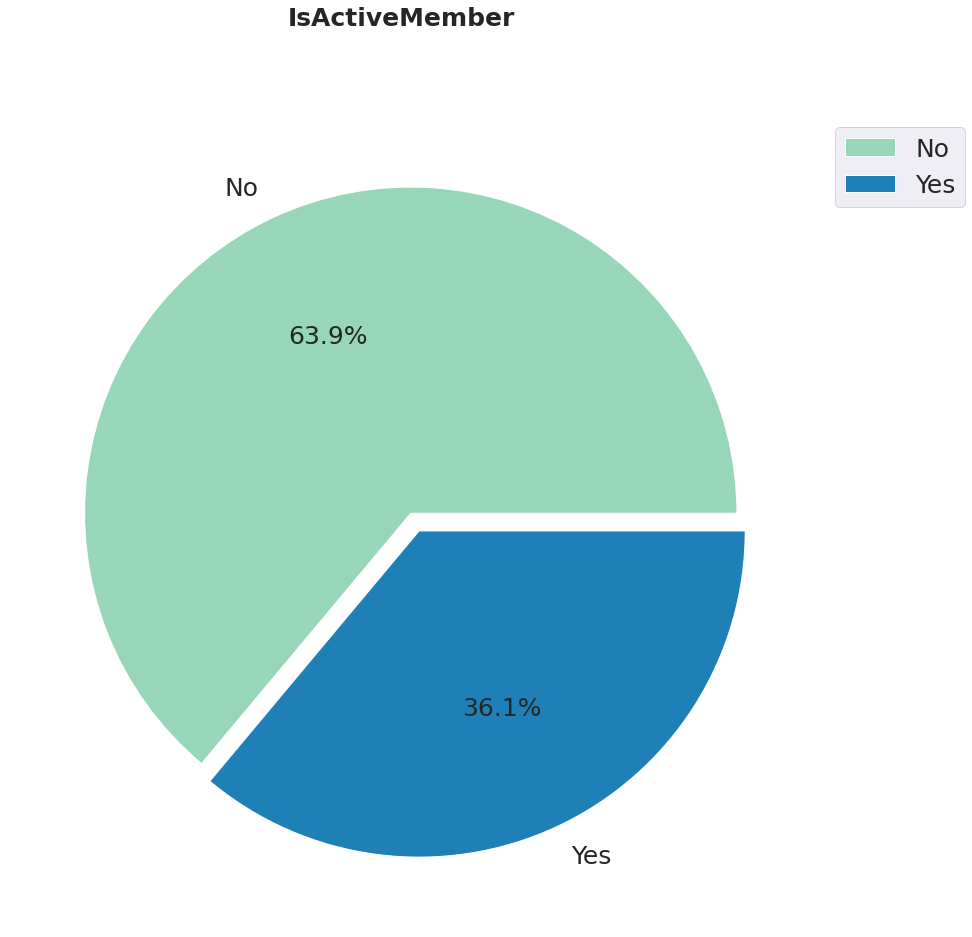

In [118]:
plt.figure(figsize = (15,15))
x=cs['IsActiveMember'][cs['Exited'] == 1].value_counts().index
y=cs['IsActiveMember'][cs['Exited'] == 1].value_counts().values.tolist()
data = cs.groupby("IsActiveMember").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))

        
plt.pie(y, labels =  ["No","Yes"], colors = pal, autopct='%1.1f%%', textprops={'fontsize': 25},
        explode=[0.03 for i in cs['IsActiveMember'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1) , prop={'size': 25})
plt.suptitle ('IsActiveMember',weight = 'bold',fontsize = 25)
plt.show()

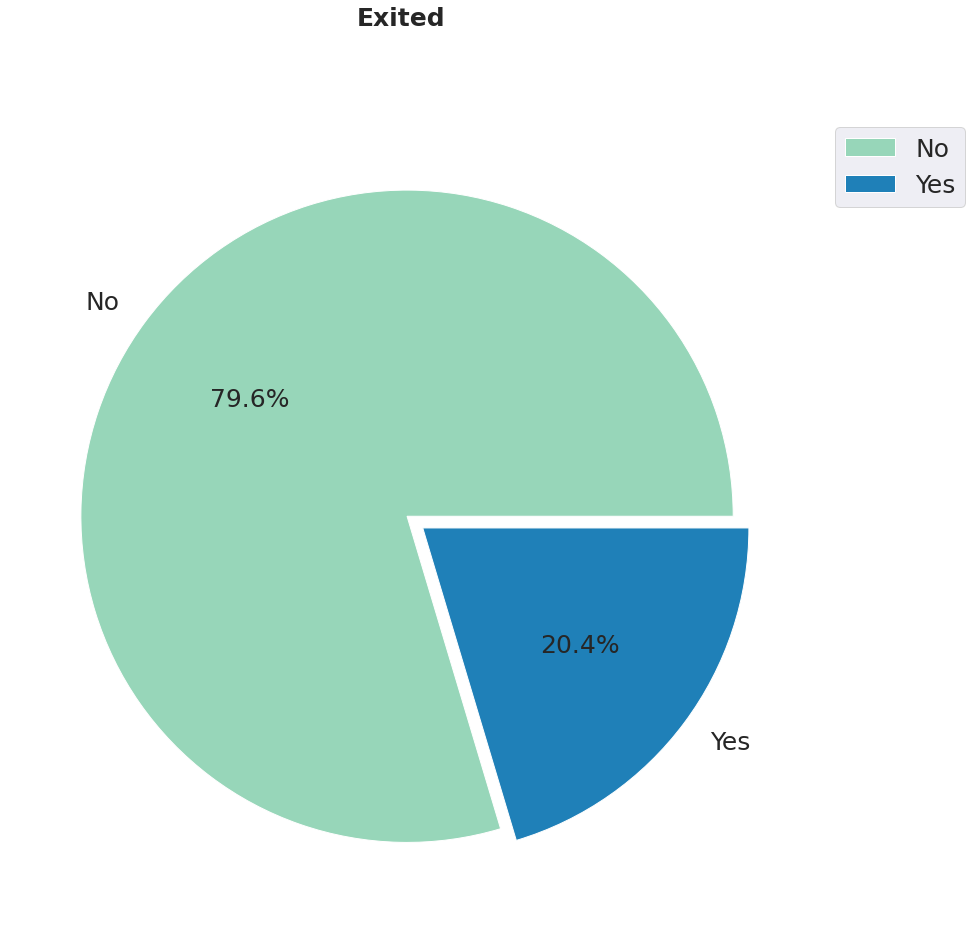

In [119]:
plt.figure(figsize = (15,15))
x=cs['Exited'].value_counts().index
y=cs['Exited'].value_counts().values.tolist()
data = cs.groupby("IsActiveMember").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))

        
plt.pie(y, labels = ["No","Yes"], colors = pal, autopct='%1.1f%%', textprops={'fontsize': 25},
        explode=[0.03 for i in cs['Exited'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1) , prop={'size': 25})
plt.suptitle ('Exited',weight = 'bold',fontsize = 25)
plt.show()

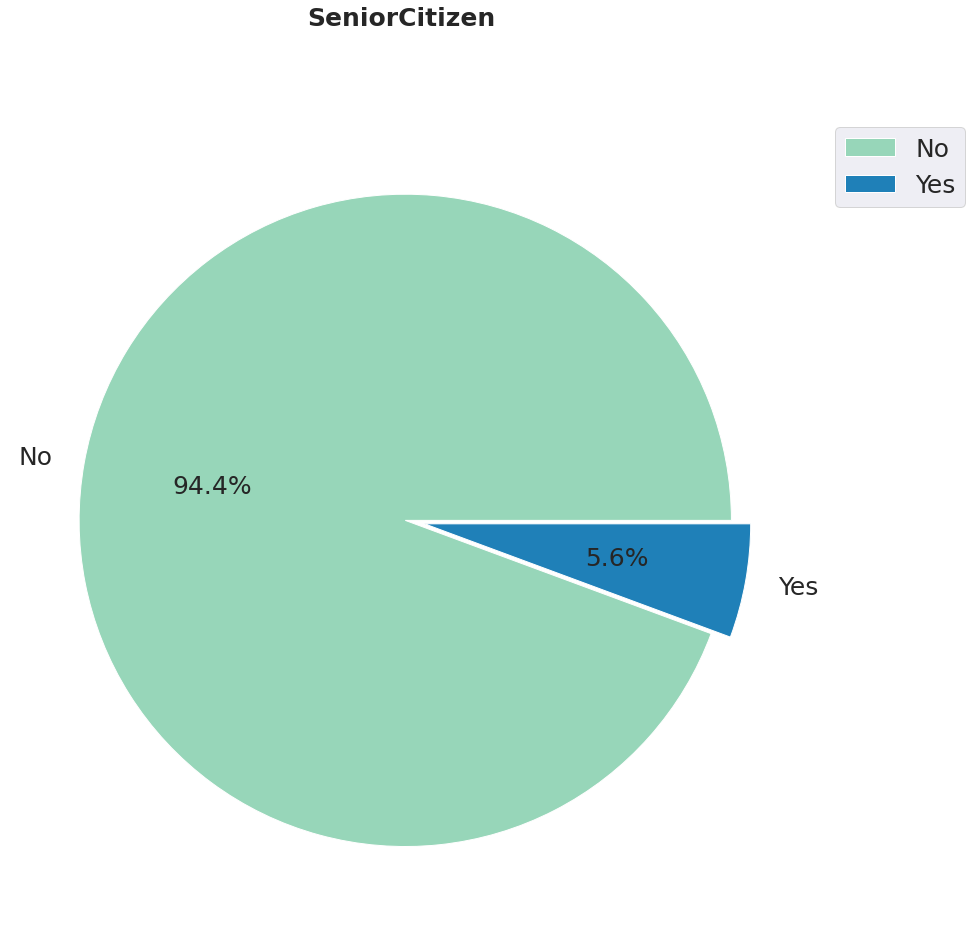

In [120]:
plt.figure(figsize = (15,15))
x=cs['SeniorCitizen'][cs['Exited'] == 1].value_counts().index
y=cs['SeniorCitizen'][cs['Exited'] == 1].value_counts().values.tolist()
data = cs.groupby("SeniorCitizen").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))

plt.pie(y, labels = ["No","Yes"], colors = pal, autopct='%1.1f%%', textprops={'fontsize': 25},
        explode=[0.03 for i in cs['SeniorCitizen'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1) , prop={'size': 25})
plt.suptitle ('SeniorCitizen',weight = 'bold',fontsize = 25)
plt.show()

# One Hot Encoding

In [121]:
cs1 = cs.drop(columns = ['RowNumber', 'CustomerId', 'Surname']).copy()
cs1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SeniorCitizen
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0


In [122]:
cate_feas

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'SeniorCitizen']

In [123]:
#cate_features = ['Geography','Gender']
onehot = ce.OneHotEncoder(cate_feas)
cs_onehot = onehot.fit_transform(cs1)
cs_onehot

,CreditScore,Geography_1,Geography_2,Geography_3,Gender_1,Gender_2,Age,Tenure,Balance,NumOfProducts,HasCrCard_1,HasCrCard_2,IsActiveMember_1,IsActiveMember_2,EstimatedSalary,Exited,SeniorCitizen_1,SeniorCitizen_2
0,619,1,0,0,1,0,42,2,0.00,1,1,0,1,0,101348.88,1,1,0
1,608,0,1,0,1,0,41,1,83807.86,1,0,1,1,0,112542.58,0,1,0
2,502,1,0,0,1,0,42,8,159660.80,3,1,0,0,1,113931.57,1,1,0
3,699,1,0,0,1,0,39,1,0.00,2,0,1,0,1,93826.63,0,1,0
4,850,0,1,0,1,0,43,2,125510.82,1,1,0,1,0,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,0,0,0,1,39,5,0.00,2,1,0,0,1,96270.64,0,1,0
9996,516,1,0,0,0,1,35,10,57369.61,1,1,0,1,0,101699.77,0,1,0
9997,709,1,0,0,1,0,36,7,0.00,1,0,1,1,0,42085.58,1,1,0
9998,772,0,0,1,0,1,42,3,75075.31,2,1,0,0,1,92888.52,1,1,0


In [124]:
cs_onehot.rename(columns = {"Geography_1":"France","Geography_2":"Spain","Geography_3":"Germany",
                            "Gender_1":"Female","Gender_2":"Male",
                            "HasCrCard_1":"HasCrCard_Yes","HasCrCard_2":"HasCrCard_No",
                            "IsActiveMember_1":"IsActiveMember_Yes","IsActiveMember_2":"IsActiveMember_No",
                            "SeniorCitizen_1":"SeniorCitizen_No","SeniorCitizen_2":"SeniorCitizen_Yes"},inplace = True)
cs_onehot

,CreditScore,France,Spain,Germany,Female,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard_Yes,HasCrCard_No,IsActiveMember_Yes,IsActiveMember_No,EstimatedSalary,Exited,SeniorCitizen_No,SeniorCitizen_Yes
0,619,1,0,0,1,0,42,2,0.00,1,1,0,1,0,101348.88,1,1,0
1,608,0,1,0,1,0,41,1,83807.86,1,0,1,1,0,112542.58,0,1,0
2,502,1,0,0,1,0,42,8,159660.80,3,1,0,0,1,113931.57,1,1,0
3,699,1,0,0,1,0,39,1,0.00,2,0,1,0,1,93826.63,0,1,0
4,850,0,1,0,1,0,43,2,125510.82,1,1,0,1,0,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,0,0,0,1,39,5,0.00,2,1,0,0,1,96270.64,0,1,0
9996,516,1,0,0,0,1,35,10,57369.61,1,1,0,1,0,101699.77,0,1,0
9997,709,1,0,0,1,0,36,7,0.00,1,0,1,1,0,42085.58,1,1,0
9998,772,0,0,1,0,1,42,3,75075.31,2,1,0,0,1,92888.52,1,1,0


In [125]:
cs_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   France              10000 non-null  int64  
 2   Spain               10000 non-null  int64  
 3   Germany             10000 non-null  int64  
 4   Female              10000 non-null  int64  
 5   Male                10000 non-null  int64  
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard_Yes       10000 non-null  int64  
 11  HasCrCard_No        10000 non-null  int64  
 12  IsActiveMember_Yes  10000 non-null  int64  
 13  IsActiveMember_No   10000 non-null  int64  
 14  EstimatedSalary     10000 non-null  float64
 15  Exited              10000 non-null  int64  
 16  Senio

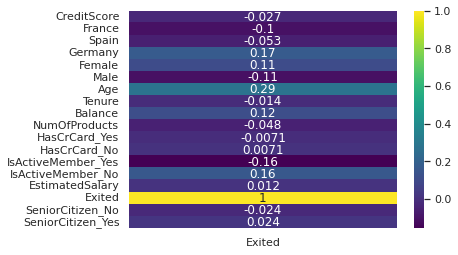

In [126]:
corr = cs_onehot.corr()
x = corr[["Exited"]]
sns.heatmap(x, annot = True, cmap = "viridis")

# Split train and test and fix imbalance train set

In [127]:
X = cs_onehot.drop(columns = ["Exited"]).copy()
y = cs_onehot["Exited"]

In [128]:
X_train_ori, X_test, y_train_ori, y_test = train_test_split(X,y,random_state=0)

In [129]:
print("X_train shape : ",X_train_ori.shape)
X_train_ori.head()

X_train shape :  (7500, 17)


,CreditScore,France,Spain,Germany,Female,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard_Yes,HasCrCard_No,IsActiveMember_Yes,IsActiveMember_No,EstimatedSalary,SeniorCitizen_No,SeniorCitizen_Yes
2967,579,0,0,1,1,0,39,5,117833.30,3,0,1,0,1,5831.00,1,0
700,750,1,0,0,1,0,32,5,0.00,2,1,0,0,1,95611.47,1,0
3481,729,0,1,0,1,0,34,9,53299.96,2,1,0,1,0,42855.97,1,0
1621,689,0,1,0,0,1,38,5,75075.14,1,1,0,1,0,8651.92,1,0
800,605,1,0,0,0,1,52,7,0.00,2,1,0,1,0,173952.50,1,0


In [130]:
print("X_test shape : ",X_test.shape)
X_test.head()

X_test shape :  (2500, 17)


,CreditScore,France,Spain,Germany,Female,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard_Yes,HasCrCard_No,IsActiveMember_Yes,IsActiveMember_No,EstimatedSalary,SeniorCitizen_No,SeniorCitizen_Yes
9394,597,0,0,1,1,0,35,8,131101.04,1,1,0,1,0,192852.67,1,0
898,523,1,0,0,1,0,40,2,102967.41,1,1,0,0,1,128702.10,1,0
2398,706,0,1,0,1,0,42,8,95386.82,1,1,0,1,0,75732.25,1,0
5906,788,1,0,0,0,1,32,4,112079.58,1,0,1,0,1,89368.59,1,0
2343,706,0,0,1,0,1,38,5,163034.82,2,1,0,1,0,135662.17,1,0


In [131]:
X_train, y_train = ADASYN(random_state=0).fit_resample(X_train_ori, y_train_ori)

In [132]:
print("X_train orginal shape : ",X_train_ori.shape)
print("X_train shape after ADASYN : ",X_train.shape)
print("y_train orginal shape : ",y_train_ori.shape)
print("y_train shape after ADASYN : ",y_train.shape)

X_train orginal shape :  (7500, 17)
X_train shape after ADASYN :  (11915, 17)
y_train orginal shape :  (7500,)
y_train shape after ADASYN :  (11915,)


In [133]:
d1 = pd.DataFrame(y_train_ori.value_counts())
fig = px.pie(d1, values = "Exited", names = ["Not Exited", "Exited"], hole = 0.35, opacity = 0.8,)
fig.update_layout(title = dict(text = "Exited counts of imbalance train set"), title_x=0.5)
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

In [134]:
d2 = pd.DataFrame(y_train.value_counts())
fig = px.pie(d2, values = "Exited", names = ["Not Exited", "Exited"], hole = 0.35, opacity = 0.8,
            labels = {"label" :"Potability","Potability":"Number of Samples"})
fig.update_layout(title = dict(text = "Exited counts of balance train set"), title_x=0.5)
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

# Standard Scaler

In [135]:
con_feas

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [136]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

In [137]:
scaler = StandardScaler()
scaler.fit(X_train[con_feas])
X_train_scale[con_feas] = scaler.transform(X_train[con_feas])
X_train_scale.head()

,CreditScore,France,Spain,Germany,Female,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard_Yes,HasCrCard_No,IsActiveMember_Yes,IsActiveMember_No,EstimatedSalary,SeniorCitizen_No,SeniorCitizen_Yes
0,-0.740513,0,0,1,1,0,-0.188325,0.095925,0.618853,2.778315,0,1,0,1,-1.644126,1,0
1,1.116851,1,0,0,1,0,-0.888165,0.095925,-1.292102,1.018420,1,0,0,1,-0.086389,1,0
2,0.888753,0,1,0,1,0,-0.688210,1.564065,-0.427713,1.018420,1,0,1,0,-1.001724,1,0
3,0.454282,0,1,0,0,1,-0.288302,0.095925,-0.074575,-0.741475,1,0,1,0,-1.595181,1,0
4,-0.458107,1,0,0,0,1,1.111378,0.829995,-1.292102,1.018420,1,0,1,0,1.272868,1,0


In [138]:
X_test_scale[con_feas] = scaler.transform(X_test[con_feas])
X_test_scale.head()

,CreditScore,France,Spain,Germany,Female,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard_Yes,HasCrCard_No,IsActiveMember_Yes,IsActiveMember_No,EstimatedSalary,SeniorCitizen_No,SeniorCitizen_Yes
9394,-0.545001,0,0,1,1,0,-0.588233,1.197030,0.834022,-0.741475,1,0,1,0,1.600795,1,0
898,-1.348773,1,0,0,1,0,-0.088347,-1.005180,0.377767,-0.741475,1,0,0,1,0.487750,1,0
2398,0.638932,0,1,0,1,0,0.111607,1.197030,0.254829,-0.741475,1,0,1,0,-0.431303,1,0
5906,1.529598,1,0,0,0,1,-0.888165,-0.271110,0.525543,-0.741475,0,1,0,1,-0.194706,1,0
2343,0.638932,0,0,1,0,1,-0.288302,0.095925,1.351906,1.018420,1,0,1,0,0.608511,1,0


# BEFORE GridSearchCV

1. K-nearest neighbors

In [139]:
knn_scaler = KNeighborsClassifier().fit(X_train_scale,y_train)
knn_test_score = knn_scaler.score(X_test_scale,y_test)
print("Accuracy of K-nearest neighbors on train set : {:.3f}".format(knn_scaler.score(X_train_scale,y_train)))
print("Accuracy of K-nearest neighbors on test set : {:.3f}".format(knn_test_score))

Accuracy of K-nearest neighbors on train set : 0.917
Accuracy of K-nearest neighbors on test set : 0.826


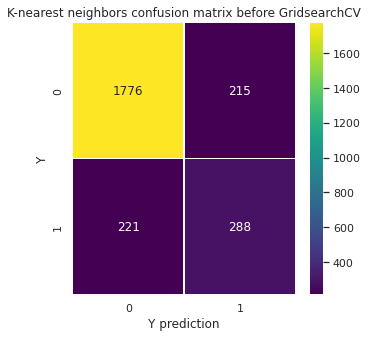

In [140]:
knn_y_pred_before = knn_scaler.predict(X_test_scale)
knn_y_true = y_test
knn_cm_before = confusion_matrix(knn_y_true, knn_y_pred_before)
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(knn_cm_before,annot = True, linewidths= 0.5, fmt=".0f", ax=ax, cmap = "viridis")
plt.title("K-nearest neighbors confusion matrix before GridsearchCV")
plt.xlabel("Y prediction")
plt.ylabel("Y")
plt.show()

In [141]:
knn_recall_before = recall_score(knn_y_true, knn_y_pred_before, average='binary')
print("KNN recall {:.3f}".format(knn_recall_before))

KNN recall 0.566


2. Random forest

In [142]:
forest_scaler = RandomForestClassifier(random_state = 1)
forest_scaler.fit(X_train_scale,y_train)
forest_test_score = forest_scaler.score(X_test_scale,y_test)
print("Accuracy of RandomForest on train set : {:.3f}".format(forest_scaler.score(X_train_scale,y_train)))
print("Accuracy of RandomForest on test set : {:.3f}".format(forest_test_score))

Accuracy of RandomForest on train set : 1.000
Accuracy of RandomForest on test set : 0.859


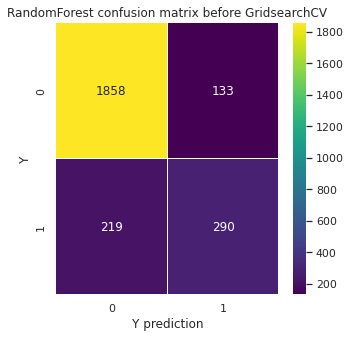

In [143]:
forest_y_pred_before = forest_scaler.predict(X_test_scale)
forest_y_true = y_test
forest_cm_before = confusion_matrix(forest_y_true, forest_y_pred_before)
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(forest_cm_before,annot = True, linewidths= 0.5, fmt=".0f", ax=ax, cmap = "viridis")
plt.title("RandomForest confusion matrix before GridsearchCV")
plt.xlabel("Y prediction")
plt.ylabel("Y")
plt.show()

In [144]:
forest_recall_before = recall_score(forest_y_true, forest_y_pred_before, average='binary')
print("forest recall {:.3f}".format(forest_recall_before))

forest recall 0.570


3. LogisticRegression

In [145]:
lr_scaler = LogisticRegression(random_state = 1)
lr_scaler.fit(X_train_scale,y_train)
lr_test_score = lr_scaler.score(X_test_scale,y_test)
print("Accuracy of LogisticRegression on train set : {:.3f}".format(lr_scaler.score(X_train_scale,y_train)))
print("Accuracy of LogisticRegression on test set : {:.3f}".format(lr_test_score))

Accuracy of LogisticRegression on train set : 0.872
Accuracy of LogisticRegression on test set : 0.829


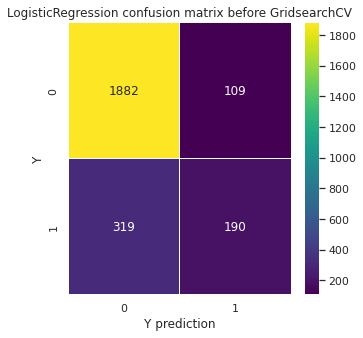

In [146]:
lr_y_pred_before = lr_scaler.predict(X_test_scale)
lr_y_true = y_test
lr_cm_before = confusion_matrix(lr_y_true, lr_y_pred_before)
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(lr_cm_before,annot = True, linewidths= 0.5, fmt=".0f", ax=ax, cmap = "viridis")
plt.title("LogisticRegression confusion matrix before GridsearchCV")
plt.xlabel("Y prediction")
plt.ylabel("Y")
plt.show()

In [147]:
lr_recall_before = recall_score(lr_y_true, lr_y_pred_before, average='binary')
print("LogisticRegression recall {:.3f}".format(lr_recall_before))

LogisticRegression recall 0.373


# AFTER GridSearchCV

1. K-nearest neighbors

In [148]:
knn_grid = {"n_neighbors":list(range(1,50))} 
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_grid, n_jobs = -1,verbose = 1, scoring = 'recall')
knn_cv.fit(X_train_scale,y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='recall', verbose=1)

In [149]:
print("Best parameters : ",knn_cv.best_params_)
print("grid accuracy :  {:.3f}".format(knn_cv.best_score_))
knn_test_score_grid = knn_cv.score(X_test_scale,y_test)
print("Recall of K-nearest neighbors : {:.3f}".format(knn_test_score_grid))


Best parameters :  {'n_neighbors': 1}
grid accuracy :  0.851
Recall of K-nearest neighbors : 0.544


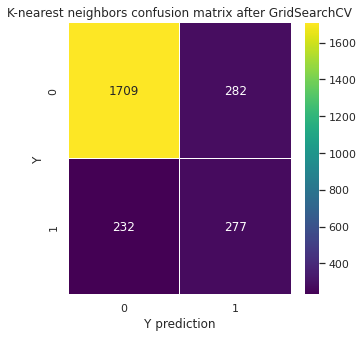

In [150]:
knn_y_pred = knn_cv.predict(X_test_scale)
knn_y_true = y_test
knn_cm = confusion_matrix(knn_y_true, knn_y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(knn_cm,annot = True, linewidths= 0.5, fmt=".0f", ax=ax, cmap = "viridis")
plt.title("K-nearest neighbors confusion matrix after GridSearchCV")
plt.xlabel("Y prediction")
plt.ylabel("Y")
plt.show()

In [151]:
knn_recall = recall_score(knn_y_true, knn_y_pred, average='binary')
print("KNN recall {:.3f}".format(knn_recall))

KNN recall 0.544


2. RandomForest

In [152]:
param_grid = { 
    'n_estimators': [1, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
forest_cv = RandomForestClassifier(random_state = 1) 
forest_cv = GridSearchCV(estimator=forest_cv, param_grid=param_grid, cv= 5,n_jobs = -1,verbose = 1, scoring = 'recall')
forest_cv.fit(X_train_scale, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100]},
             scoring='recall', verbose=1)

In [153]:
print("Best parameters : ",forest_cv.best_params_)
print("grid accuracy :  {:.3f}".format(forest_cv.best_score_))
forest_test_score_grid = forest_cv.score(X_test_scale,y_test)
print("Recall of RandomForest : {:.3f}".format(forest_test_score_grid))

Best parameters :  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}
grid accuracy :  0.832
Recall of RandomForest : 0.611


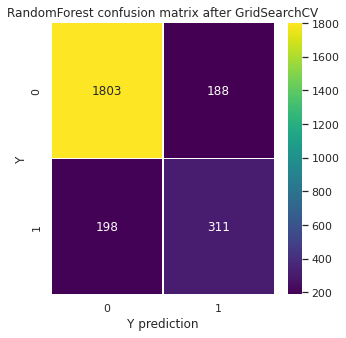

In [154]:
forest_y_pred = forest_cv.predict(X_test_scale)
forest_y_true = y_test
forest_cm = confusion_matrix(forest_y_true, forest_y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(forest_cm,annot = True, linewidths= 0.5, fmt=".0f", ax=ax, cmap = "viridis")
plt.title("RandomForest confusion matrix after GridSearchCV")
plt.xlabel("Y prediction")
plt.ylabel("Y")
plt.show()

In [155]:
forest_recall = recall_score(forest_y_true, forest_y_pred, average='binary')
print("KNN recall {:.3f}".format(forest_recall))

KNN recall 0.611


3. LogisticRegression

In [156]:
grid = {"penalty":["l1","l2"], "C":np.logspace(-3,3,7)}# l1 lasso l2 ridge
logis = LogisticRegression(random_state = 1)
logis_cv = GridSearchCV(estimator=logis, param_grid=grid, cv= 5,n_jobs = -1,verbose = 1, scoring = 'recall')
logis_cv.fit(X_train_scale,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [157]:
print("Best parameters : ",logis_cv.best_params_)
print("grid accuracy :  {:.3f}".format(logis_cv.best_score_))
lr_test_score_grid = logis_cv.score(X_test_scale,y_test)
print("Recall of Logistic test set : {:.3f}".format(lr_test_score_grid))

Best parameters :  {'C': 0.001, 'penalty': 'l2'}
grid accuracy :  0.790
Recall of Logistic test set : 0.605


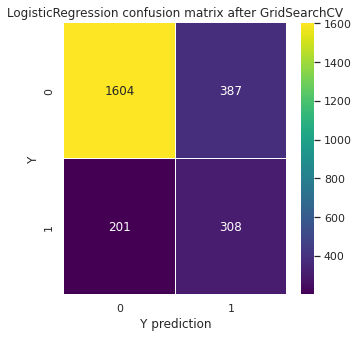

In [158]:
lr_y_pred = logis_cv.predict(X_test_scale)
lr_y_true = y_test
lr_cm = confusion_matrix(lr_y_true, lr_y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(lr_cm,annot = True, linewidths= 0.5, fmt=".0f", ax=ax, cmap = "viridis")
plt.title("LogisticRegression confusion matrix after GridSearchCV")
plt.xlabel("Y prediction")
plt.ylabel("Y")
plt.show()

In [159]:
lr_recall = recall_score(lr_y_true, lr_y_pred, average='binary')
print("logisticRegression recall {:.3f}".format(lr_recall))

logisticRegression recall 0.605


# Classification report

1. K-nearest neighbors

Before GridSearchCV

In [160]:
print(classification_report(knn_y_true,knn_y_pred_before))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1991
           1       0.57      0.57      0.57       509

    accuracy                           0.83      2500
   macro avg       0.73      0.73      0.73      2500
weighted avg       0.82      0.83      0.83      2500



After GridSearchCV

In [161]:
print(classification_report(knn_y_true,knn_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1991
           1       0.50      0.54      0.52       509

    accuracy                           0.79      2500
   macro avg       0.69      0.70      0.69      2500
weighted avg       0.80      0.79      0.80      2500



2. RandomForest

Before GridSearchCV

In [162]:
print(classification_report(forest_y_true,forest_y_pred_before))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1991
           1       0.69      0.57      0.62       509

    accuracy                           0.86      2500
   macro avg       0.79      0.75      0.77      2500
weighted avg       0.85      0.86      0.85      2500



After GridSearchCV

In [163]:
print(classification_report(forest_y_true,forest_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1991
           1       0.62      0.61      0.62       509

    accuracy                           0.85      2500
   macro avg       0.76      0.76      0.76      2500
weighted avg       0.84      0.85      0.85      2500



3. LogisticRegression

Before GridSearchCV

In [164]:
print(classification_report(lr_y_true,lr_y_pred_before))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1991
           1       0.64      0.37      0.47       509

    accuracy                           0.83      2500
   macro avg       0.75      0.66      0.68      2500
weighted avg       0.81      0.83      0.81      2500



After GridSearchCV

In [165]:
print(classification_report(lr_y_true,lr_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1991
           1       0.44      0.61      0.51       509

    accuracy                           0.76      2500
   macro avg       0.67      0.71      0.68      2500
weighted avg       0.80      0.76      0.78      2500



# Result

In [166]:
print("Model Recall on test set")
d1 = {'Model': ["K-nearest neighbors","RandomForest","LogisticRegression"], 'Recall before GridSearchCV': [knn_recall_before,forest_recall_before,lr_recall_before],
    'Recall after GridSearchcv': [knn_recall,forest_recall,lr_recall],
    "Best parameter" : [knn_cv.best_params_, forest_cv.best_params_, logis_cv.best_params_]}
df1 = pd.DataFrame(data=d1)
pd.set_option("display.max_colwidth", 10000)
df1 = df1.set_index('Model')
#df1.sort_values(by = ["Recall after GridSearchcv"],inplace=True,ascending=False)
df1

Model Recall on test set


,Recall before GridSearchCV,Recall after GridSearchcv,Best parameter
Model,,,
K-nearest neighbors,0.565815,0.544204,{'n_neighbors': 1}
RandomForest,0.569745,0.611002,"{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}"
LogisticRegression,0.373281,0.605108,"{'C': 0.001, 'penalty': 'l2'}"
